# How to Build a Machine Learning Model in Python

## Learning Objectives
In the modeling stage of the machine learning process, our goal is to choose and apply the appropriate machine learning approach that works with the data we have and solves the problem that we intend to solve. If our objective is to build a model that predicts a numeric or continuous value, then our problem is known as a regression problem. One of the most common models used in solving regression problems is **Linear Regression**. By the end of the tutorial, you will have learned:

+ how to collect, explore and prepare data
+ how to build and evaluate a model

## Collect the Data

In [2]:
# Importing pandas library
import pandas as pd

# Load the dataset into a DataFrame
bikes = pd.read_csv('bikes.csv')

# Preview the first few rows of the dataset
bikes.head()

,temperature,humidity,windspeed,rentals
0,46.716528,0.815969,13.669663,985
1,48.350239,0.800497,15.199782,801
2,34.212394,0.592097,13.247558,1349
3,34.520000,0.623196,11.687963,1562
4,36.800562,0.624643,13.148281,1600


## Explore the Data

In [2]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  731 non-null    float64
 1   humidity     731 non-null    float64
 2   windspeed    731 non-null    float64
 3   rentals      731 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 23.0 KB


In [3]:
bikes.describe()

,temperature,humidity,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000
mean,59.509553,0.486937,9.238886,4504.348837
std,15.486114,0.185415,3.379815,1937.211452
min,22.602432,0.000000,0.932208,22.000000
25%,46.117264,0.353548,6.863568,3152.000000
50%,59.758972,0.502227,9.503508,4548.000000
75%,73.048236,0.624671,11.814559,5956.000000
max,90.497028,0.972500,21.126627,8714.000000


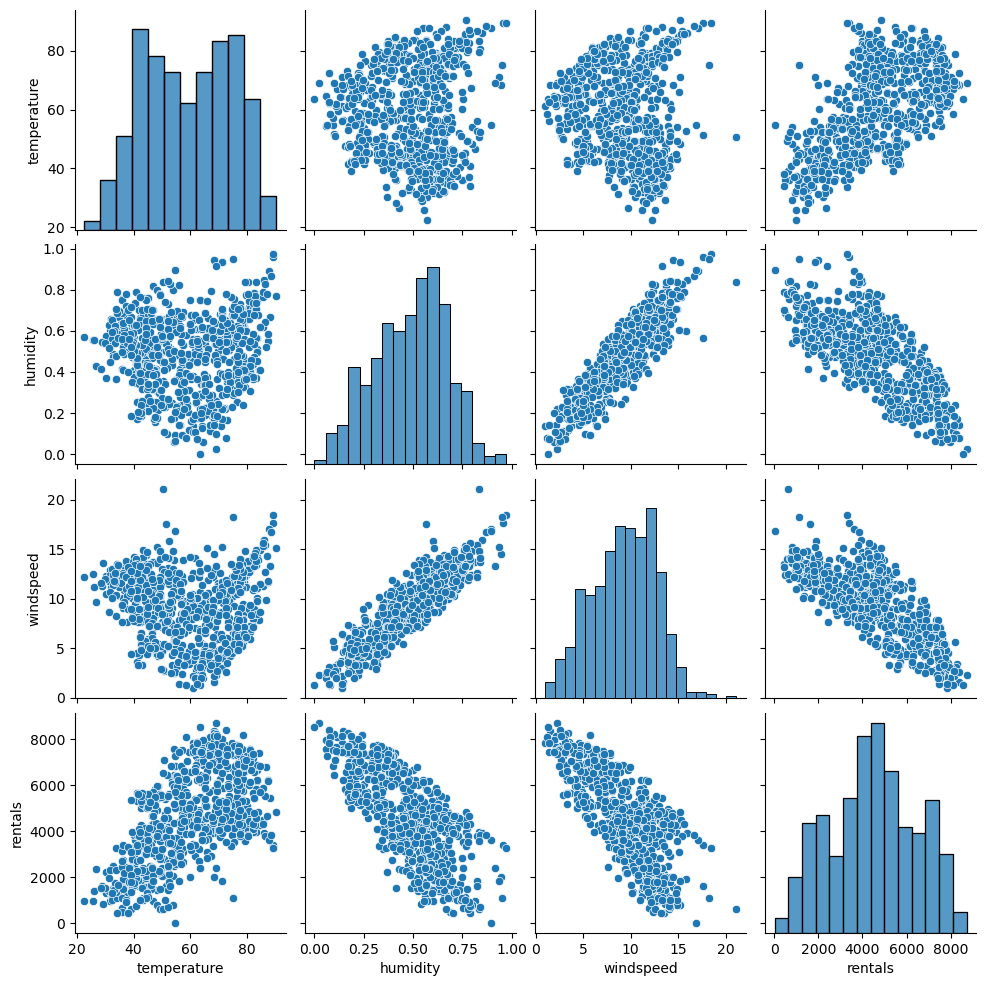

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pair plot for the dataset
sns.pairplot(bikes)
plt.show()

In [7]:
# Compute the correlation matrix
correlation_matrix = bikes[['temperature', 'humidity', 'windspeed']].corr()
correlation_matrix

,temperature,humidity,windspeed
temperature,1.000000,0.055479,-0.024560
humidity,0.055479,1.000000,0.898802
windspeed,-0.024560,0.898802,1.000000


## Prepare the Data

In [13]:
# Separate features and target for the original model
X = bikes[['temperature', 'humidity', 'windspeed']]
y = bikes['rentals']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Separate features and target for the feature removal model
X_reduced = bikes[['temperature', 'humidity']]
y = bikes['rentals']

# Split the reduced data into training and testing sets
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(
    X_reduced, y, test_size=0.2, random_state=42
)

In [15]:
# Ridge regression uses the same train-test split as the original model
ridge_X_train, ridge_X_test, ridge_y_train, ridge_y_test = X_train, X_test, y_train, y_test

## Train the Model

In [16]:
from sklearn.linear_model import LinearRegression

# Train the original linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [17]:
# Train the linear regression model with reduced features
reduced_model = LinearRegression()
reduced_model.fit(X_train_reduced, y_train_reduced)

LinearRegression()

In [18]:
# Train the linear regression model with reduced features
reduced_model = LinearRegression()
reduced_model.fit(X_train_reduced, y_train_reduced)

LinearRegression()

The model coefficients correspond to the order in which the independent variables are listed in the training data. This means that the equation for the fitted regression line can be written as:

$y = 3800.68 + 80.35 \times temperature - 4665.74 \times humidity - 196.22 \times windspeed$

With the linear regression equation, we can estimate what our model will predict given any weather condition. For example, given a temperature of $72^{\circ}F$, $22\%$ humidity and windspeed of $5$ miles per hour, our model would predict:

$7,578 \text{ bikes} \approx 3800.68 + 80.35 \times 72 - 4665.74 \times .22 - 196.22 \times 5$


## 5. Evaluate the Model

In [19]:
from sklearn.metrics import mean_absolute_error, r2_score

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    r2 = r2_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    return {"R2": r2, "MAE": mae}

In [20]:
# Evaluate the original model
original_metrics = evaluate_model(linear_model, X_test, y_test)
print("Original Model Metrics:", original_metrics)

Original Model Metrics: {'R2': 0.9849089066332898, 'MAE': 195.75572460780492}


In [21]:
# Evaluate the feature removal model
reduced_metrics = evaluate_model(reduced_model, X_test_reduced, y_test_reduced)
print("Feature Removal Model Metrics:", reduced_metrics)

Feature Removal Model Metrics: {'R2': 0.962582964237887, 'MAE': 300.7416105441953}


In [22]:
# Evaluate the Ridge regression model
ridge_metrics = evaluate_model(ridge_model, X_test, y_test)
print("Ridge Regression Model Metrics:", ridge_metrics)

Ridge Regression Model Metrics: {'R2': 0.9830119889967113, 'MAE': 204.92256591908136}
